In [1]:
from station_data import *
from stream_processing import *
from event_detection import *
from catalogued_events import *
from stream_processing import *
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import torch
import sys
from report_generation import *

### This Notebook produces contents for report or email notification using previous saved files of data produced.

Initiating Parameters for Report Content Generation

In [2]:
# Set date and station for studying423
date = UTCDateTime("2024-04-23") 
station = ['AM','R50D6','https://data.raspberryshake.org']

# Generate a path for all files to be saved to
date_folder = generate_data_path(date, station)
content_path = os.path.join(date_folder, "generated")
os.makedirs(content_path, exist_ok=True)

Reading Saved Files

In [3]:
saved_catalogue, provider = read_catalogue_file(date_folder)
saved_df_completed = read_csv_from_path(date_folder, date, station, 'completed')
saved_processed_stream = read_stream_from_path(date_folder, date, station, 'processed')
saved_annotated_stream = read_stream_from_path(date_folder, date, station, 'processed.annotated')

Loaded catalogue from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23_IRIS.catalogue.xml
Loaded csv from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23.completed.csv
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23_AM.R50D6..Z.processed.mseed
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23_AM.R50D6..Z.processed.annotated.mseed


In [4]:
saved_catalogue

29 Event(s) in Catalog:
2024-04-24T00:15:14.040000Z | +19.195,  -67.411 | 3.39 Md
2024-04-23T22:41:30.870000Z | +18.883,  -65.340 | 3.3  Md
...
2024-04-23T00:03:49.290000Z | +23.699, +121.639 | 4.5  mb
2024-04-22T23:35:39.486000Z | +23.814, +121.596 | 4.3  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'

Save Catalogue Globe Plot To File

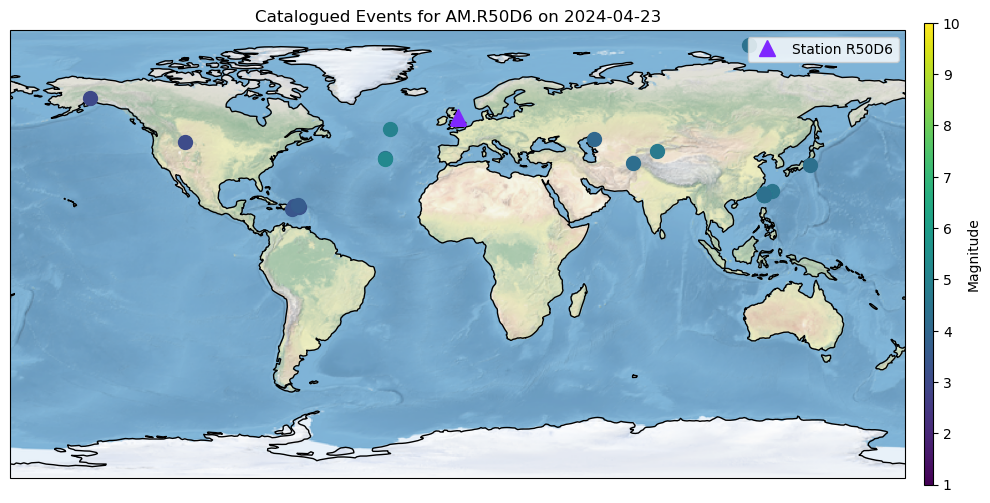

In [5]:
plot_catalogue(saved_catalogue,station, date,  fill_map = True, path=content_path,show=True, save=False);

In [6]:
plot_catalogue(saved_catalogue,station, date,  fill_map = True, path=content_path,show=False, save=True);

Save Wave+Annotation Plots For Matched Events To File Using Event ID

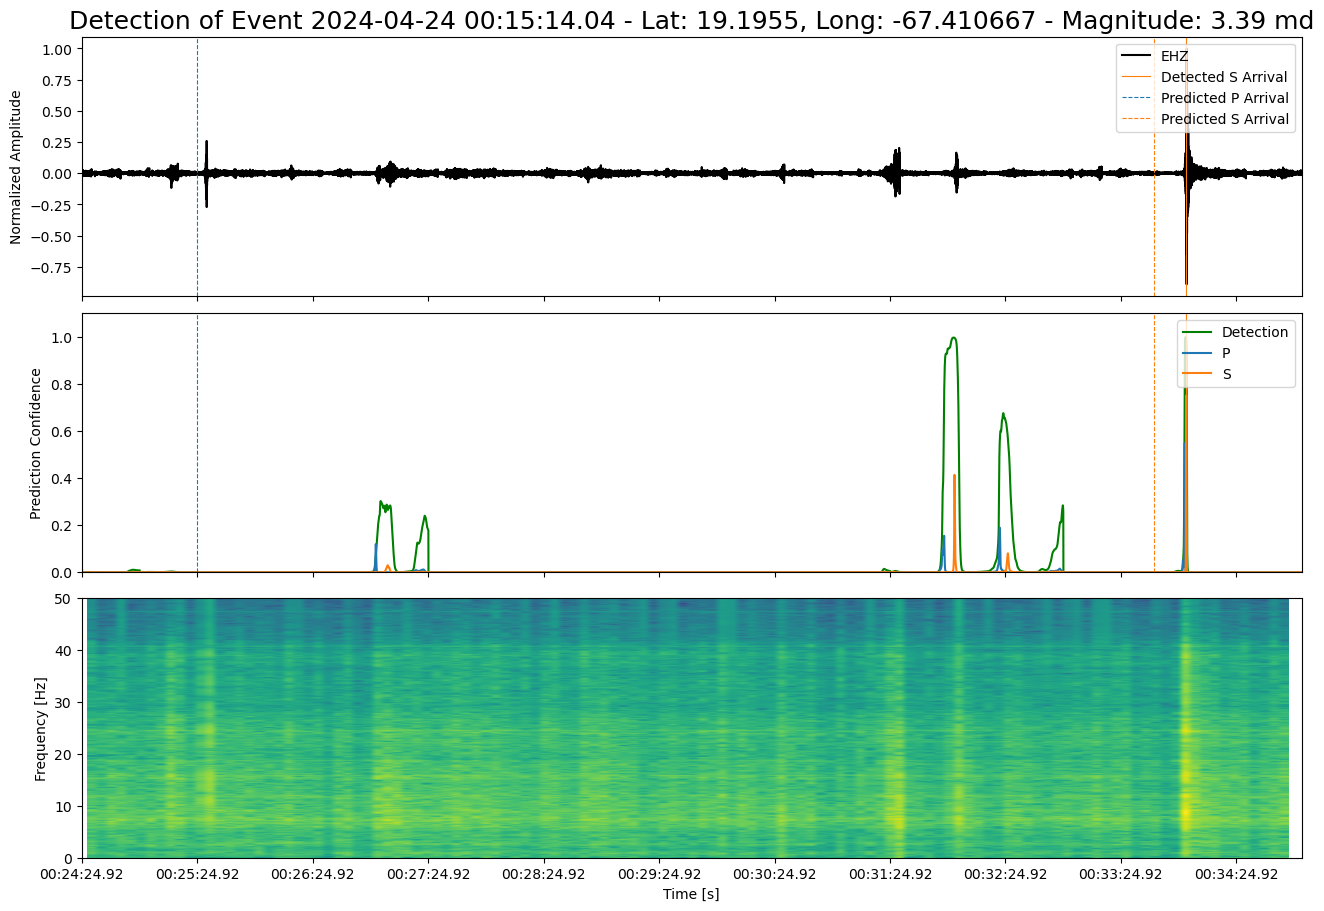

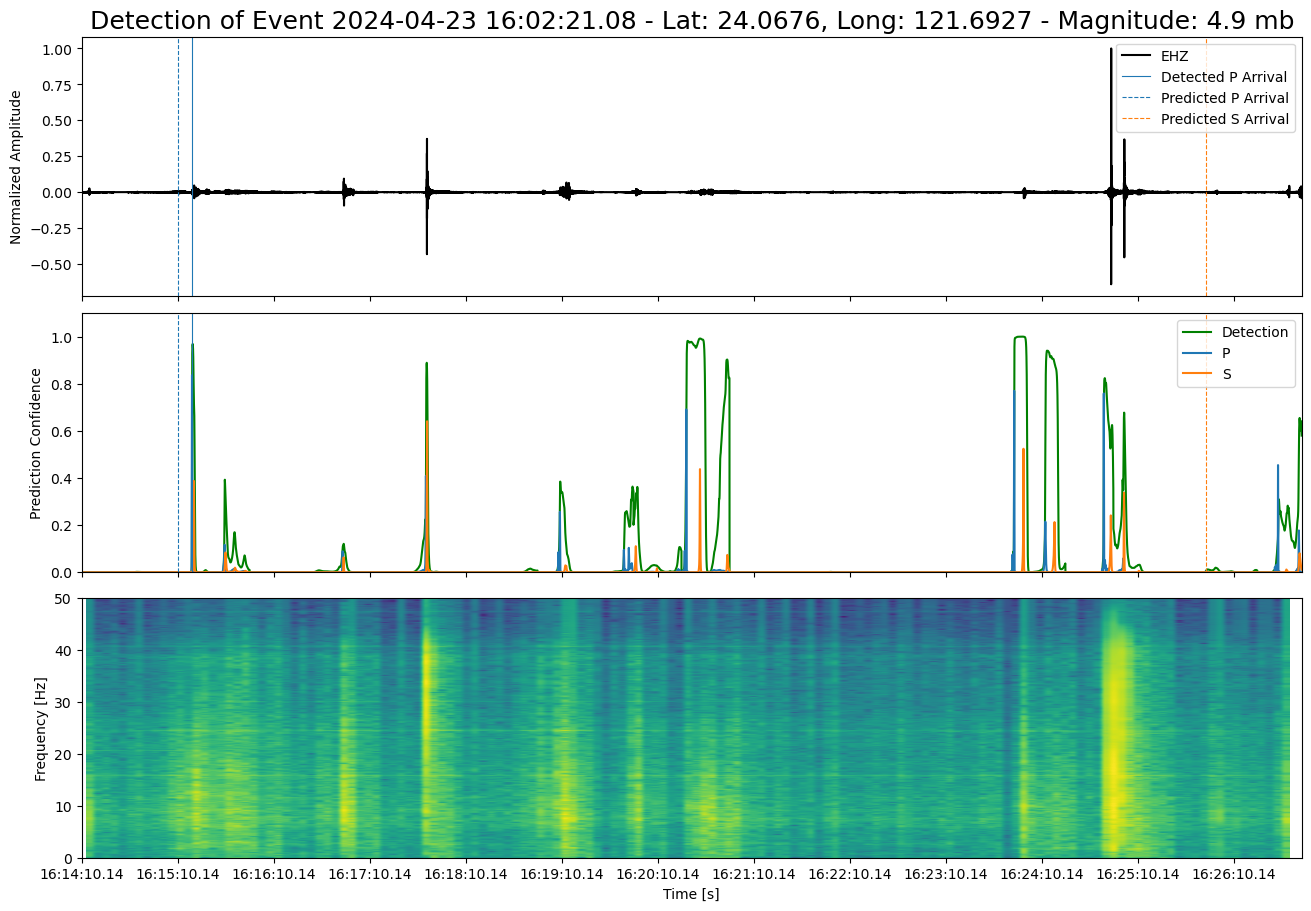

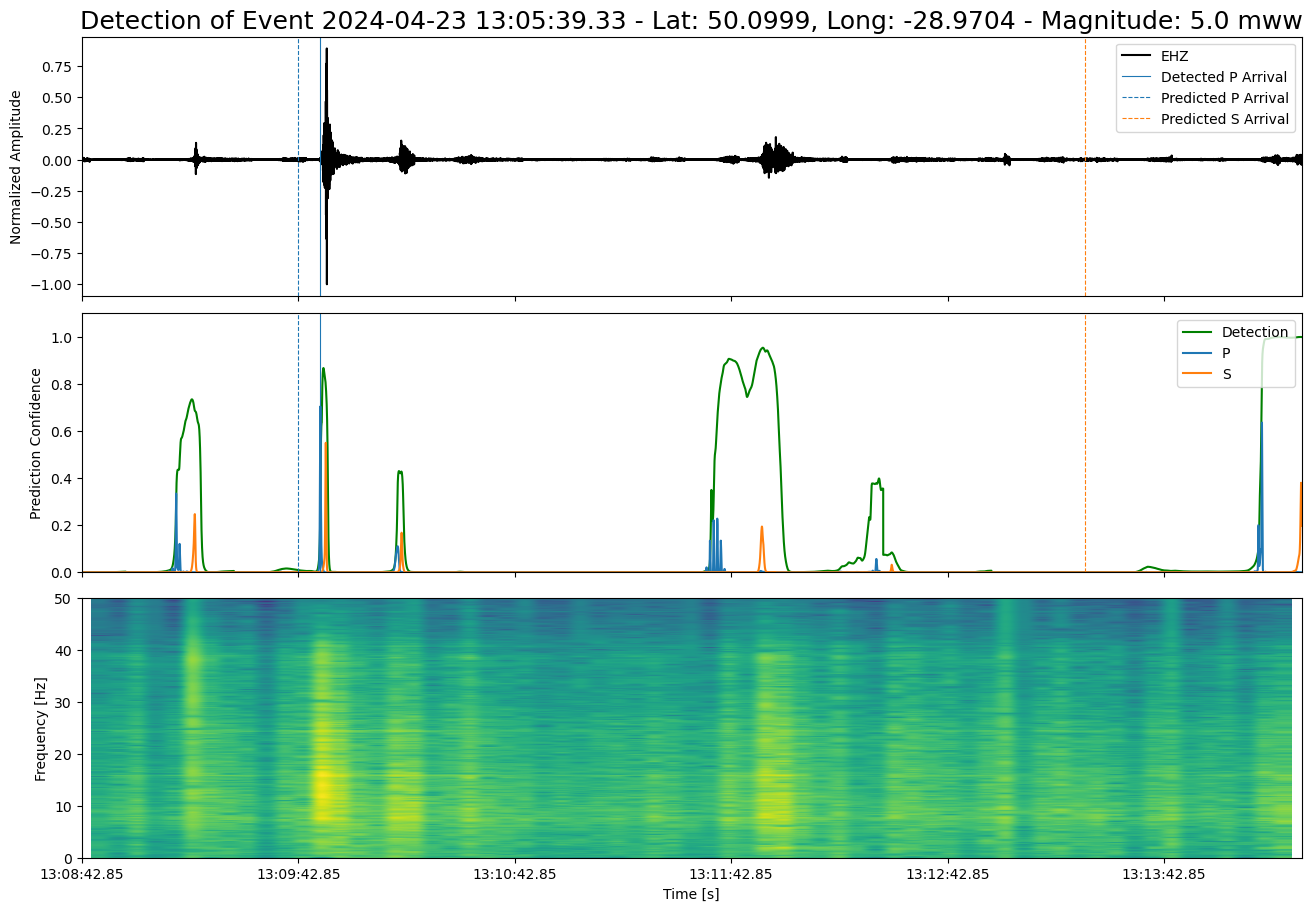

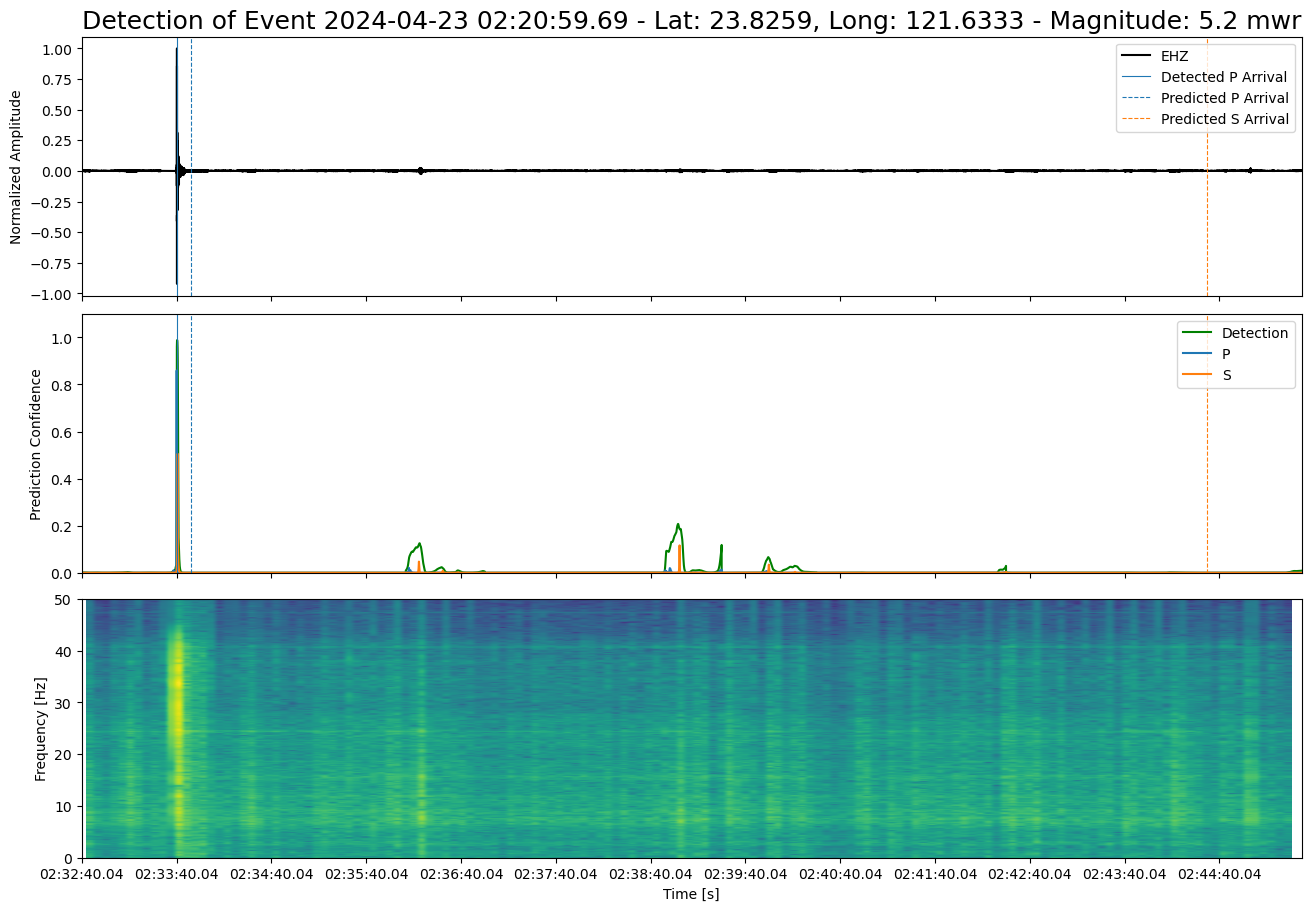

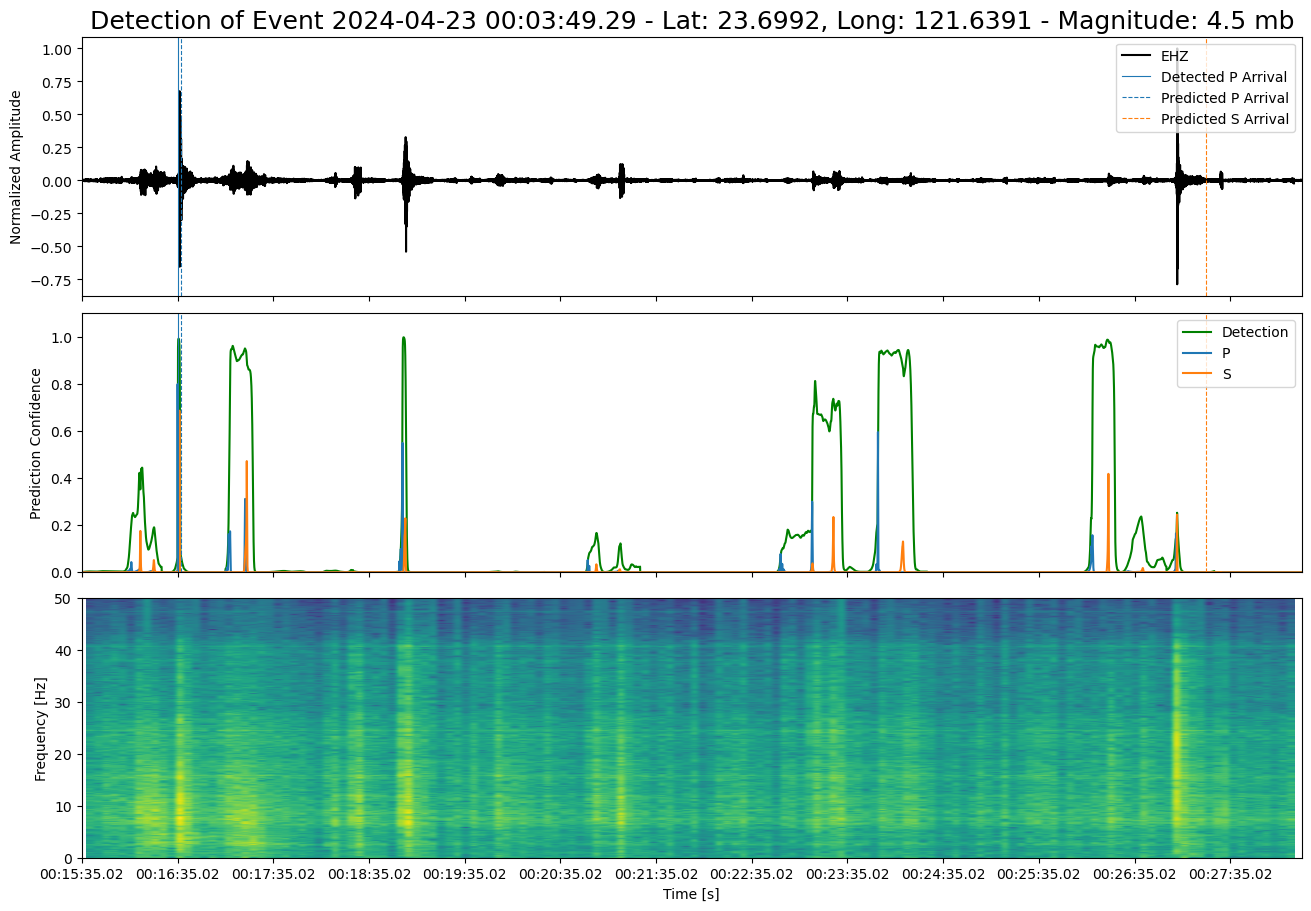

In [7]:
matched_events = saved_df_completed[(saved_df_completed['catalogued'] == True) & (saved_df_completed['detected'] == True)]

for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=True, save=False)

In [8]:
for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=False, save=True)

Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832277.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832096.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832031.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11831877.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11831857.png


Statistics For Matched Events

In [9]:
for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    print_event_info(earthquake_info)

Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=11832277
Earthquake Time: 2024-04-24T00:15:14.040000
Location: Lat 19.1955, Long -67.410667
Magnitude: 3.39 md
Depth: 9.97 m
Distance to Station: 6739.90 km

Predicted P time: 2024-04-24T00:25:24.918537
Detected P time: nan
Predicted S time: 2024-04-24T00:33:41.907555
Detected S time: 2024-04-24T00:33:58.880000
Prediction confidence: P: nan   S: 0.7496539950370789
----------------------------------------
Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=11832096
Earthquake Time: 2024-04-23T16:02:21.083000
Location: Lat 24.0676, Long 121.6927
Magnitude: 4.9 mb
Depth: 6.571 m
Distance to Station: 9743.51 km

Predicted P time: 2024-04-23T16:15:10.138300
Detected P time: 2024-04-23T16:15:18.970000
Predicted S time: 2024-04-23T16:25:52.739126
Detected S time: nan
Prediction confidence: P: 0.8357216715812683   S: nan
----------------------------------------
Event ID: smi:service.iris.edu/fdsnws/event/1/query?eventid=118320

Generate HTML Codes For Email

In [10]:
html_code = create_earthquake_report_html(saved_df_completed, content_path, date, station, provider)

HTML report generated: D:\Dissertation\data\AM.R50D6\2024-04-23\generated\2024-04-23_report.html


In [11]:
def send_email(email_message, recipient):
    print("Preparing to send an email...")

    # SMTP server settings
    smtp_server = "smtp.126.com"
    smtp_port = 25
    smtp_obj = smtplib.SMTP(smtp_server, smtp_port)
    print("SMTP server connected.")

    # User login information
    email_address = 'seismicreport@126.com'  # Replace with your 126 email address
    password = 'LKBYSOWAVLDGUOBN'  # Replace with your password or app-specific password

    # Log in to the SMTP server
    smtp_obj.login(email_address, password)
    print("Logged in to the SMTP server.")

    # Set the sender and recipient information in the email message
    email_message['From'] = email_address
    email_message['To'] = recipient
    print("Sender and recipient set.")

    # Send the email
    smtp_obj.sendmail(email_address, recipient, email_message.as_string())
    print("Email sent.")

    # Disconnect from the SMTP server
    smtp_obj.quit()
    print("Disconnected from the SMTP server.")


In [12]:
msg = prepare_email(html_code, content_path, date)

send_email(msg, 'seismicreport@126.com')

Images have been embedded. Message ready.
Preparing to send an email...
SMTP server connected.
Logged in to the SMTP server.
Sender and recipient set.
Email sent.
Disconnected from the SMTP server.
